In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.io import show
from bokeh.models import ColumnDataSource, DataTable, TableColumn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans

In [2]:
df_catalysis_dataset = pd.read_csv("../data/OCM-data.csv", index_col=0, header=0)
df_catalysis_dataset.dtypes

M1                    object
M1_atom_number         int64
M2                    object
M2_atom_number         int64
M3                    object
M3_atom_number         int64
Support               object
Support_ID             int64
M2_mol               float64
M3_mol               float64
M1_mol_percentage      int64
M2_mol_percentage      int64
M3_mol_percentage      int64
Temp                   int64
Total_flow             int64
Ar_flow              float64
CH4_flow             float64
O2_flow              float64
CT                   float64
CH4/O2                 int64
CH4_conv             float64
C2y                  float64
C2H6y                float64
C2H4y                float64
COy                  float64
CO2y                 float64
C2s                  float64
C2H6s                float64
C2H4s                float64
COs                  float64
CO2s                 float64
dtype: object

In [16]:
x = df_catalysis_dataset[["Ar_flow", "CH4_flow", "O2_flow", "CT", "M2_mol", "M3_mol"]].values
print(x)

[[ 1.5    5.7    2.8    0.75   0.37   0.185]
 [ 2.3    8.5    4.3    0.5    0.37   0.185]
 [ 3.    11.3    5.7    0.38   0.37   0.185]
 ...
 [ 7.     2.6    0.4    0.75   0.37   0.   ]
 [10.5    3.9    0.6    0.5    0.37   0.   ]
 [14.     5.1    0.9    0.38   0.37   0.   ]]


In [4]:
# CH4_conv, C2y, COy
y = df_catalysis_dataset["COy"].values
print(y)

[30.82 31.29 21.62 ...  1.5   1.61  2.15]


In [5]:
pre_process = PolynomialFeatures(degree=1)

In [6]:
X_poly = pre_process.fit_transform(x)
X_poly

array([[ 1.   ,  1.5  ,  5.7  , ...,  0.75 ,  0.37 ,  0.185],
       [ 1.   ,  2.3  ,  8.5  , ...,  0.5  ,  0.37 ,  0.185],
       [ 1.   ,  3.   , 11.3  , ...,  0.38 ,  0.37 ,  0.185],
       ...,
       [ 1.   ,  7.   ,  2.6  , ...,  0.75 ,  0.37 ,  0.   ],
       [ 1.   , 10.5  ,  3.9  , ...,  0.5  ,  0.37 ,  0.   ],
       [ 1.   , 14.   ,  5.1  , ...,  0.38 ,  0.37 ,  0.   ]])

In [7]:
ml = LinearRegression()
ml.fit(X_poly, y)

LinearRegression()

In [8]:
y_pred = ml.predict(X_poly)
y_pred

array([15.55622521, 18.34185341, 21.06784424, ...,  6.15058019,
        3.72677192,  2.28829108])

Text(0, 0.5, 'Predicted')

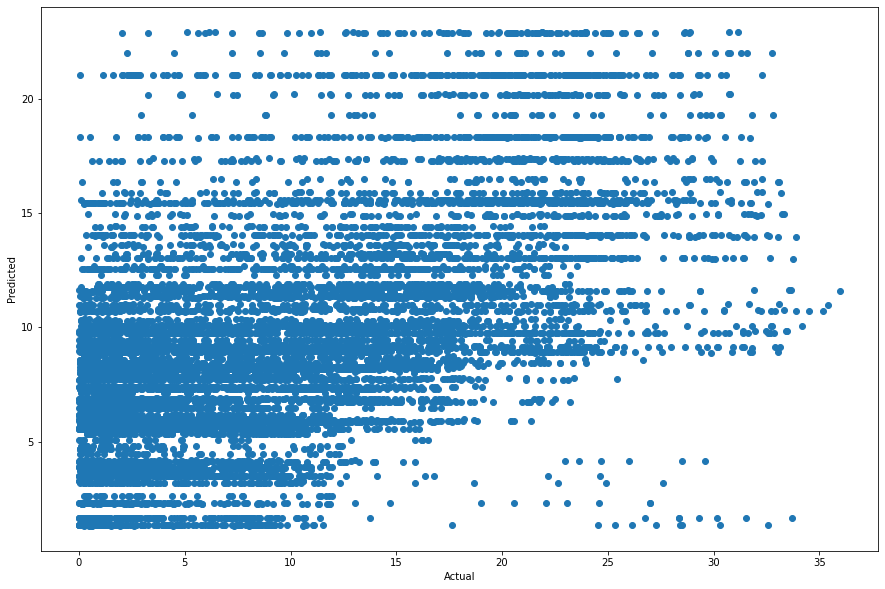

In [9]:
plt.figure(figsize=(15, 10))
plt.scatter(y, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
# plt.plot(x, y_pred)

In [10]:
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans[:20])

[0 2 2 0 2 2 0 2 2 0 2 2 0 0 3 0 3 3 0 3]


In [11]:
kmeans.cluster_centers_

array([[ 4.30769231,  4.60769231,  1.47692308,  0.73076923,  0.25050992,
         0.13835694],
       [12.25      ,  4.0375    ,  1.2125    ,  0.44      ,  0.25050992,
         0.13835694],
       [ 2.65      , 11.4375    ,  3.4625    ,  0.44      ,  0.25050992,
         0.13835694],
       [ 7.14285714,  8.37142857,  2.35714286,  0.43142857,  0.25050992,
         0.13835694]])

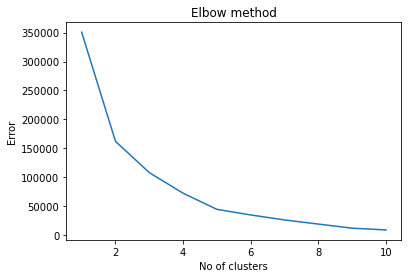

[350571.762322, 162199.93107199986, 108168.8391553349, 72568.06550533412, 44727.54383866984, 35076.06493866879, 26427.05426533477, 19305.75463866803, 12225.846615335155, 9235.105888668602]


In [12]:
Error = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
plt.title("Elbow method")
plt.xlabel("No of clusters")
plt.ylabel("Error")
plt.show()
print(Error)

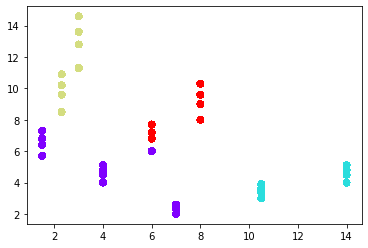

In [28]:
plt.scatter(x[:,0], x[:,1], c=y_kmeans, cmap="rainbow")

In [27]:
print(x[:10])
print(x[:,0][:10])
print(len(x[:,0]))

[[ 1.5    5.7    2.8    0.75   0.37   0.185]
 [ 2.3    8.5    4.3    0.5    0.37   0.185]
 [ 3.    11.3    5.7    0.38   0.37   0.185]
 [ 1.5    6.4    2.1    0.75   0.37   0.185]
 [ 2.3    9.6    3.2    0.5    0.37   0.185]
 [ 3.    12.8    4.3    0.38   0.37   0.185]
 [ 1.5    6.8    1.7    0.75   0.37   0.185]
 [ 2.3   10.2    2.6    0.5    0.37   0.185]
 [ 3.    13.6    3.4    0.38   0.37   0.185]
 [ 1.5    7.3    1.2    0.75   0.37   0.185]]
[1.5 2.3 3.  1.5 2.3 3.  1.5 2.3 3.  1.5]
12708


In [20]:
print(x[:,1][:10])

[ 5.7  8.5 11.3  6.4  9.6 12.8  6.8 10.2 13.6  7.3]
